In [1]:
import os
import pandas as pd
import IPython.display as ipd
# import librosa
# import librosa.display
import music21
from musicir.rhythm.generate import Euclid, RhythmViewer
from musicir.rhythm import generate 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import copy
import glob

In [2]:
semitons = lista = list(range(0,12))
semitons.extend(list(range(0,12)))
semitons

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [3]:
notes = ['C','Db','D','Eb','E','F','Gb','G','Ab','A','Bb','B']
# notes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
notes

['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B']

In [4]:
E= Euclid(3,8)

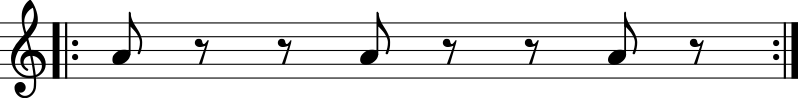

In [5]:
E.beat.show()

In [6]:
# ES = generate.traditional_rhythms['samba']
# ES.beat.show()

Aqui, vamos testar trocar as notas que aparecem no objeto do tipo Euclid, que é derivado de um stream do music21.

C C
E E
G G
B B


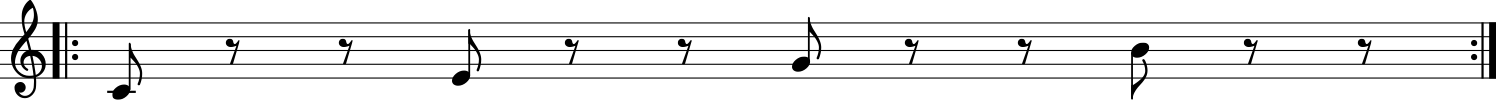

In [12]:
stream1 = generate.traditional_rhythms['fandango'].beat


fundamental = 0
terca = fundamental + 4
quinta = fundamental + 7
setima = fundamental + 11

i_C = semitons[fundamental]
i_E = semitons[terca]
i_G = semitons[quinta]
i_B = semitons[setima]


acorde_list = [notes[i_C], 
               notes[i_E], 
               notes[i_G], 
               notes[i_B]]





counter = 0
# print(acorde_list)
for element in stream1[0]:
    if type(element) == music21.note.Note:
        
        nota_nova = acorde_list[counter]
#         print(nota_nova)
        
        # tratando o problema com bemóis
        if 'b' in nota_nova:
            nota_nova = nota_nova[0] # pegamos só o nome da nota sem o b e adicionamos um '-' 
            element.step = nota_nova
            element.pitch.accidental = '-'
            print(nota_nova, element.step, element.pitch.accidental)
            
        else:            
            element.step = nota_nova
            element.pitch.accidental = 'natural'
            print(nota_nova, element.step)
            
        counter += 1

stream1.show()

### 22/09
Uhul! Conseguimos gerar os acordes com ritmo euclidiano para ritmos com 4 articulações. Próximo passo é conseguir fazê-lo para ritmos com mais articulações, amostrando aleatoriamente notas do próprio acorde para compensar os ataques que faltarem. 
Pendência: questão das oitavas. Ex.: num acorde de E7M (mi, sol#, si, ré#), a sétima deverá aparecer numa oitava diferente do resto, pois se não será mais grave do que a fundamental. Como generalizar esta conta para todos os acordes?

In [41]:
fundamental = 0 + 4
terca = fundamental + 4
quinta = fundamental + 7
setima = fundamental + 11

i_C = semitons[fundamental]
i_E = semitons[terca]
i_G = semitons[quinta]
i_B = semitons[setima]


acorde_list = [notes[i_C], 
               notes[i_E], 
               notes[i_G], 
               notes[i_B]]


s = music21.converter.parse('tinyNotation: 4/4 {} {} {} {} '.format(acorde_list[0],  
                                                                           acorde_list[1], acorde_list[2], 
                                                                           acorde_list[3]))

s.show('midi')
# acorde = music21.chord.Chord(list(acorde_list), duration=d)

# midi_subfolder = '{}/{}/midi_original'.format(corpus_folder, 
#                                               chord_type)

# os.makedirs(midi_subfolder, 
#             exist_ok=True)  

# acorde_file_name = '{}/{}{}'.format(midi_subfolder, 
#                                        notes[i], 
#                                        chord_type)

# acorde_file = acorde_file_name + '.mid'

# acorde.write('midi', acorde_file)


# !timidity {acorde_file_name}.mid -Ow -o {acorde_file_name}.wav

# print(notes[i], acorde.pitches)
# print('---------------------------------')